In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sys
sys.path.append('../')
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
from src.data_loader import load_test_dataset, load_train_dataset

In [2]:
IMAGES_PATH_TO_SAVE = '../images/'
TITLE_SIZE=20
XTICKS_SIZE=14

In [3]:
data_train = load_train_dataset(purpose='eda')
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,level,super_service,super_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,ftp_data,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,other,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,security,ddos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,web_services,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,web_services,normal


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [190]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.144650,45566.743000,19779.114421,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.515310,5870331.181894,4021269.151441,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.000000,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [191]:
def show_grouped_bar_chart_categorical(data, feature_1, feature_2, title, filename = ''):
    df = pd.DataFrame(data)
    grouped_data = df.groupby([feature_1, feature_2]).size().unstack(fill_value=0)
    grouped_data = grouped_data.loc[grouped_data.sum(axis=1).sort_values(ascending=False).index]
    
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(14, 6), fontsize=12)

    plt.xlabel(feature_1, fontsize=XTICKS_SIZE + 1)
    plt.ylabel('Number of Entries', fontsize=XTICKS_SIZE + 1)
    plt.title(title, fontsize=TITLE_SIZE)
    plt.xticks(rotation=45, fontsize=XTICKS_SIZE + 2) 
    if filename is not '':
        plt.savefig(IMAGES_PATH_TO_SAVE + filename, bbox_inches="tight")
    plt.show()
    

## Super service and Super classes

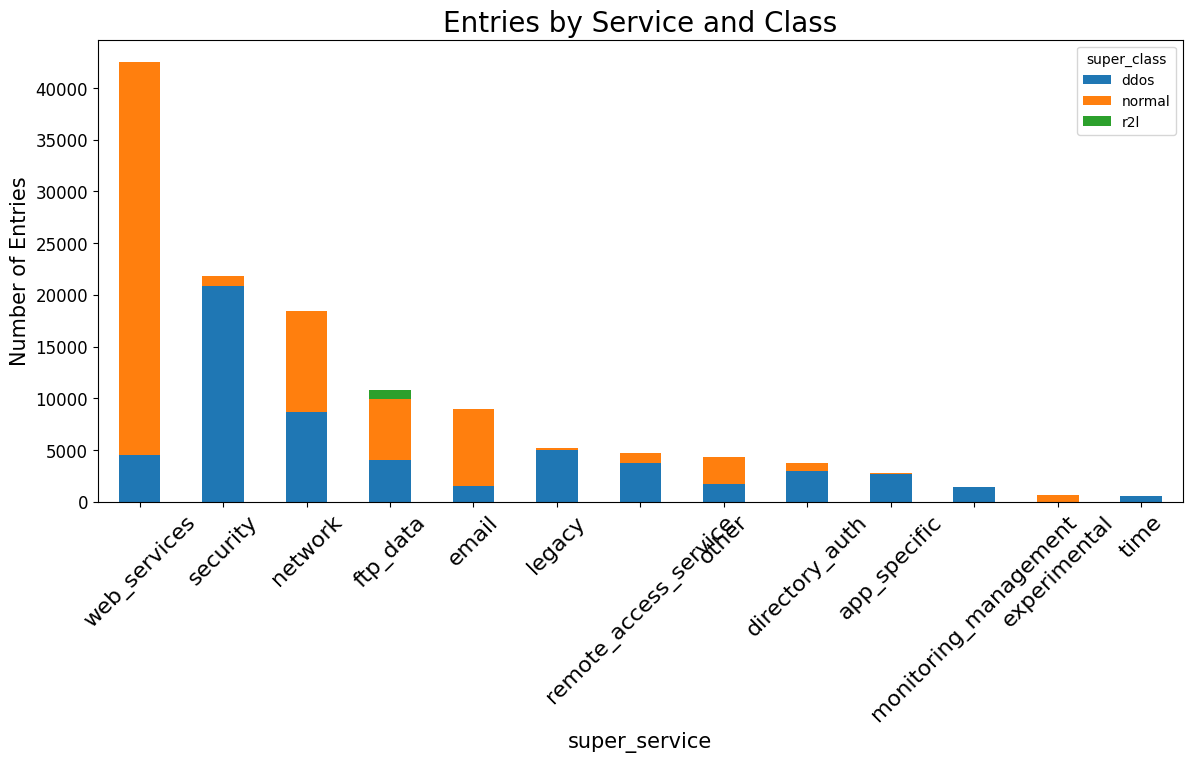

In [192]:
show_grouped_bar_chart_categorical(data_train, 'super_service', 'super_class', 'Entries by Service and Class', "bar_service_class.png")

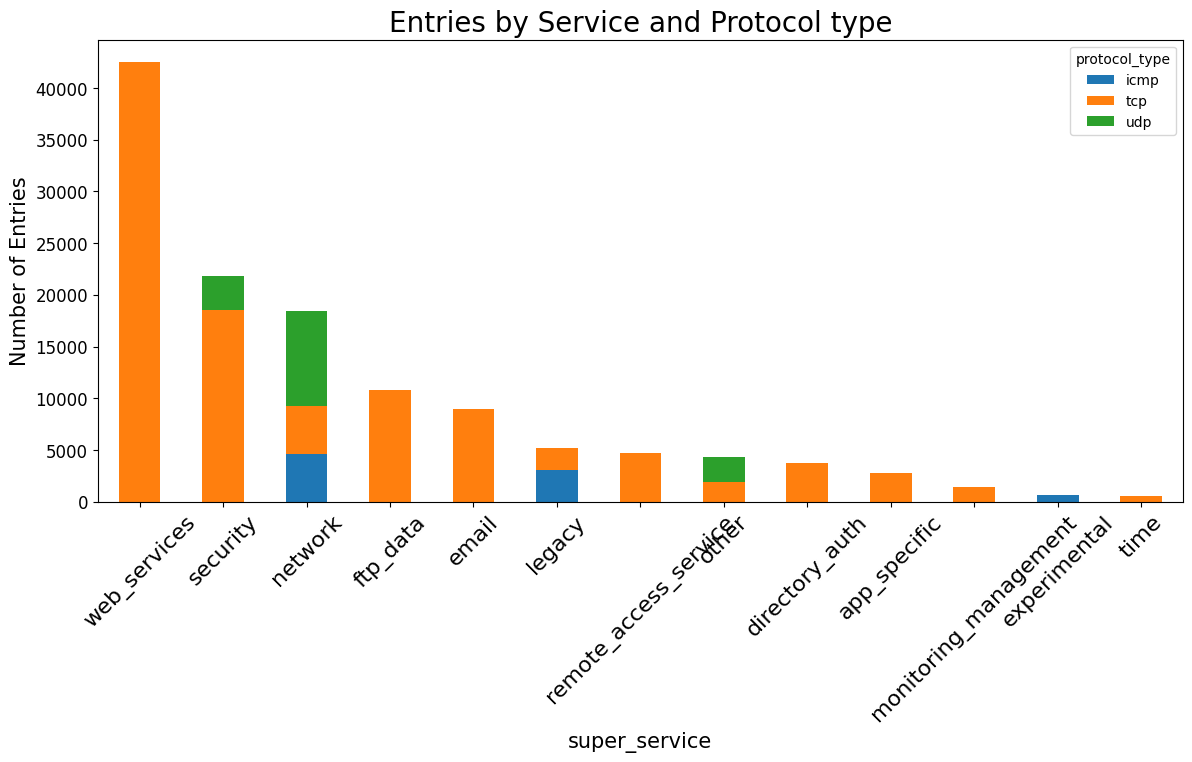

In [193]:
show_grouped_bar_chart_categorical(data_train, 'super_service', 'protocol_type', 'Entries by Service and Protocol type', 'bar_service_protocol.png')

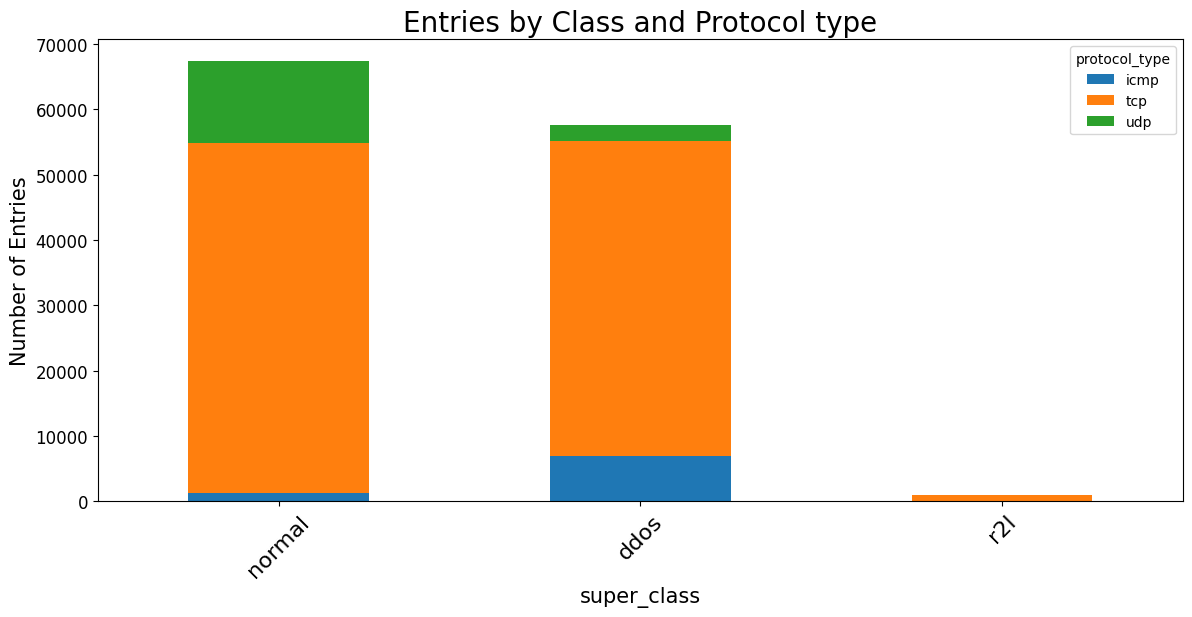

In [194]:
show_grouped_bar_chart_categorical(data_train, 'super_class', 'protocol_type', 'Entries by Class and Protocol type', 'bar_class_protocol.png')

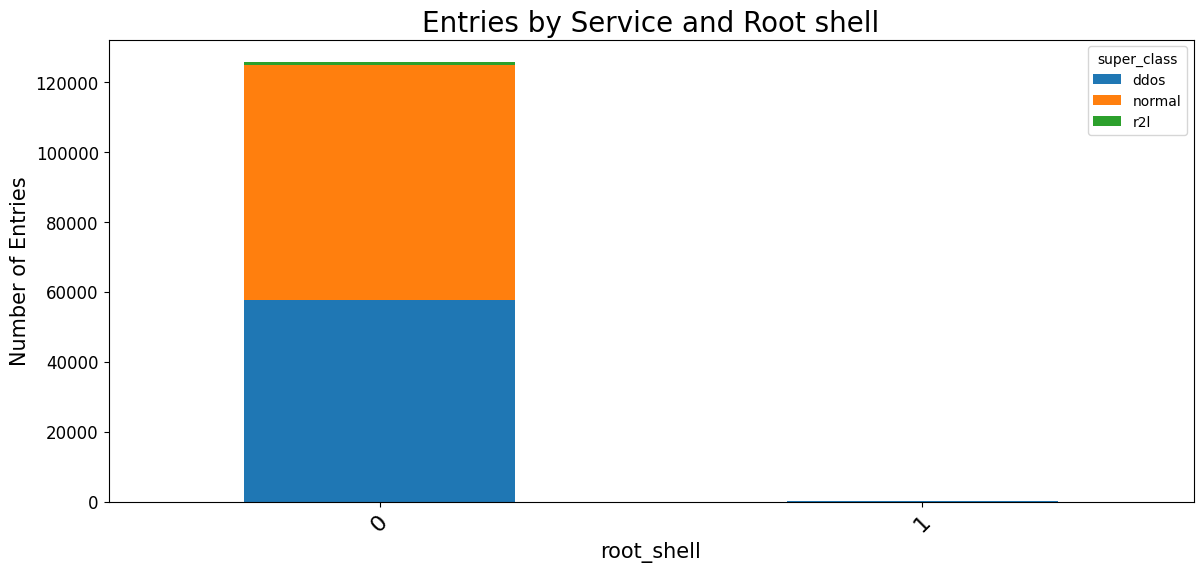

In [195]:
show_grouped_bar_chart_categorical(data_train, 'root_shell', 'super_class',  'Entries by Service and Root shell')

In [24]:
def show_grouped_bar_chart_numerical(data, feature_1, feature_2, feature_3, title, filename=''):
    df = pd.DataFrame(data)
    
    grouped_data_1 = df.groupby(feature_1)[feature_2].mean().sort_values(ascending=False)
    grouped_data_2 = df.groupby(feature_1)[feature_3].mean().sort_values(ascending=False)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
    
    grouped_data_1.plot(kind='barh', ax=axes[0], color='steelblue')
    axes[0].set_xlabel('Mean value of ' + feature_2, fontsize=XTICKS_SIZE+ 1)
    axes[0].set_ylabel(feature_1, fontsize=XTICKS_SIZE + 1)
    axes[0].set_title('Mean ' + feature_2 + ' by ' + feature_1, fontsize=XTICKS_SIZE+ 1)
    axes[0].tick_params(axis='x', labelsize=XTICKS_SIZE)
    axes[0].tick_params(axis='y', labelsize=XTICKS_SIZE)
    
    grouped_data_2.plot(kind='barh', ax=axes[1], color='darkorange')
    axes[1].set_xlabel('Mean value of ' + feature_3, fontsize=XTICKS_SIZE+ 1)
    axes[1].set_title('Mean ' + feature_3 + ' by ' + feature_1, fontsize=XTICKS_SIZE + 1)
    axes[1].tick_params(axis='x', labelsize=XTICKS_SIZE)
    axes[1].tick_params(axis='y', labelsize=XTICKS_SIZE)
    
    plt.suptitle(title, fontsize=TITLE_SIZE + 1)
    plt.tight_layout()
    
    if filename:
        plt.savefig(IMAGES_PATH_TO_SAVE + filename, bbox_inches="tight")
    
    plt.show()

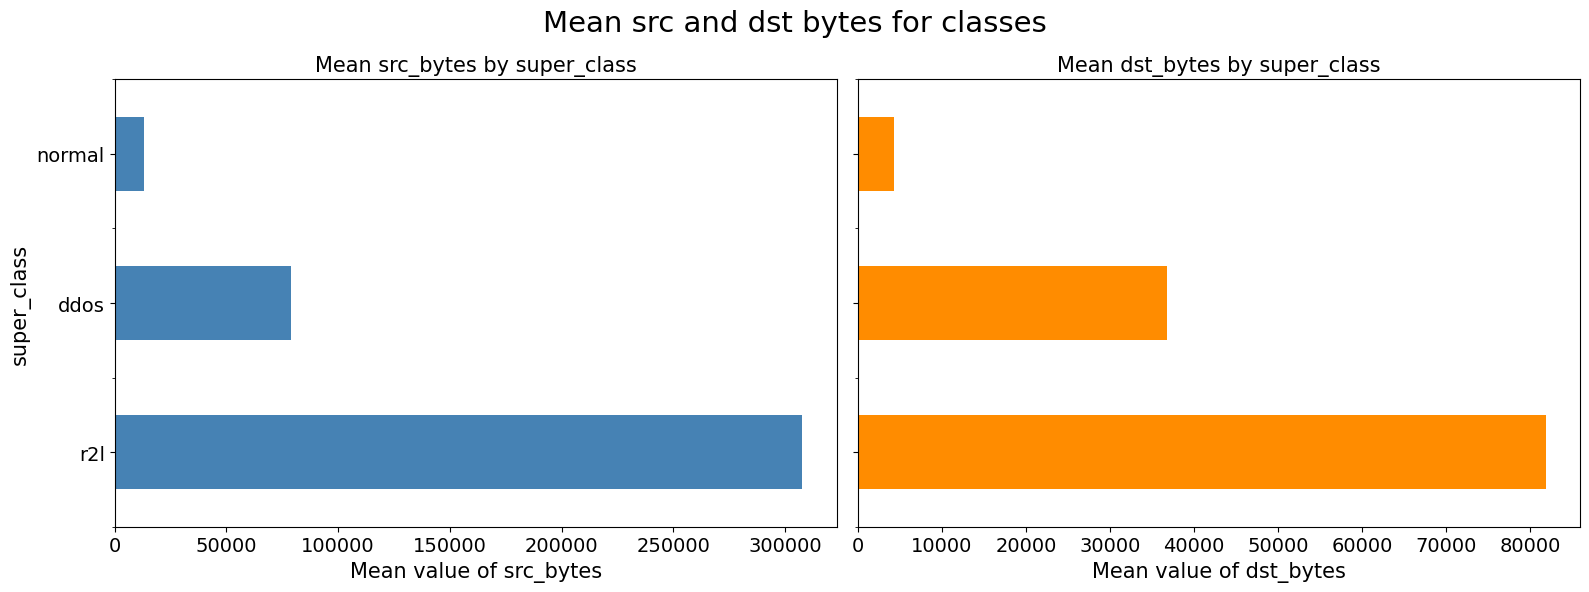

In [25]:
show_grouped_bar_chart_numerical(data_train, 'super_class', 'src_bytes', 'dst_bytes', 'Mean src and dst bytes for classes', 'bar_class_src_dst_bytes.png')

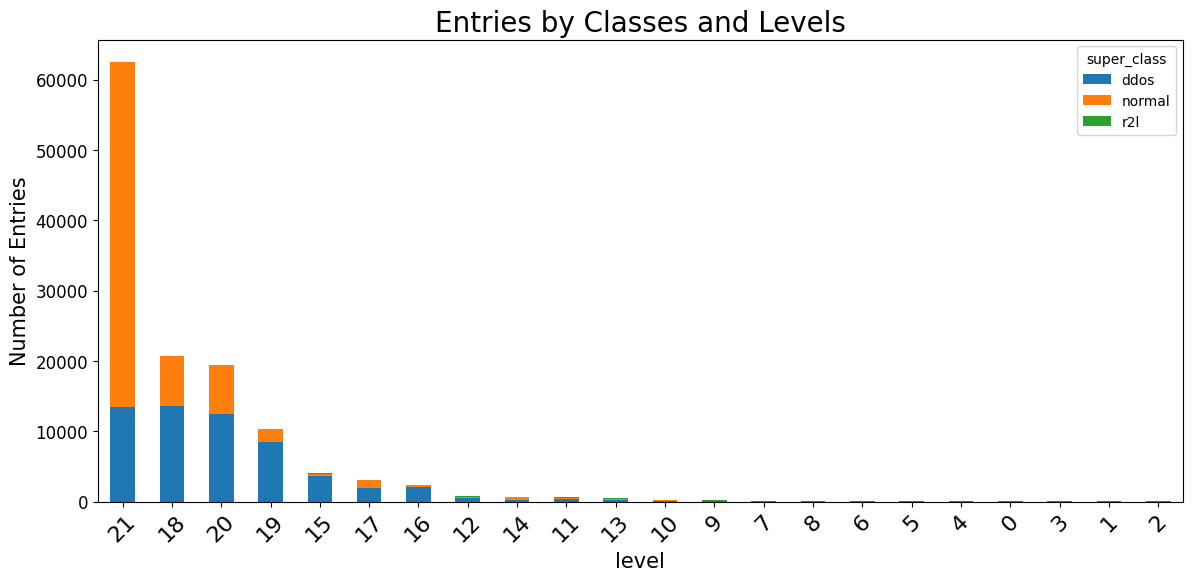

In [199]:
show_grouped_bar_chart_categorical(data_train, 'level', 'super_class', 'Entries by Classes and Levels')

In [200]:
def pie_plot(df, feature_name: str, title:str, filename: str = ''):
    value_counts = df[feature_name].value_counts()
    top_categories = value_counts.nlargest(6)
    others_count = value_counts.iloc[6:].sum()
    
    if others_count > 0:
        top_categories['others'] = others_count

    plt.figure(figsize=(10, 10))
    top_categories.plot(
        kind='pie',
        fontsize=XTICKS_SIZE + 3,
        autopct='%1.0f%%',
        ylabel=''
    )
    plt.title(title, fontsize=TITLE_SIZE)
    if filename:
        plt.savefig(IMAGES_PATH_TO_SAVE + filename, bbox_inches="tight")    
    plt.show()

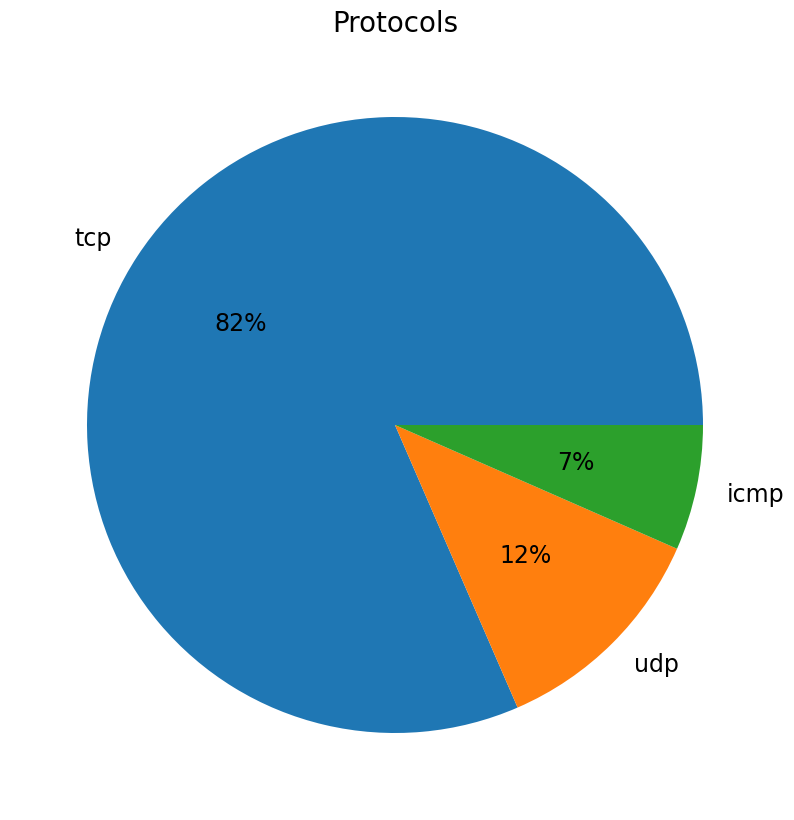

In [184]:
pie_plot(data_train, 'protocol_type', 'Protocols', 'pie_chart_protocols.png')

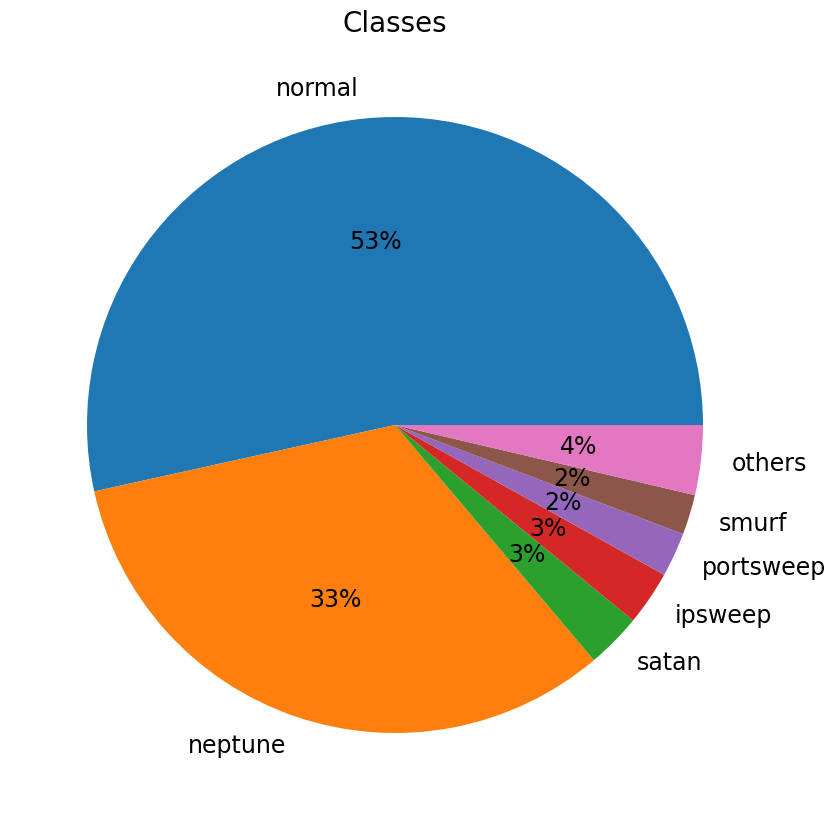

In [185]:
pie_plot(data_train, 'class', 'Classes', 'pie_chart_class.png')